In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

/home/jnsbck/Applications/anaconda3/envs/sbi_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


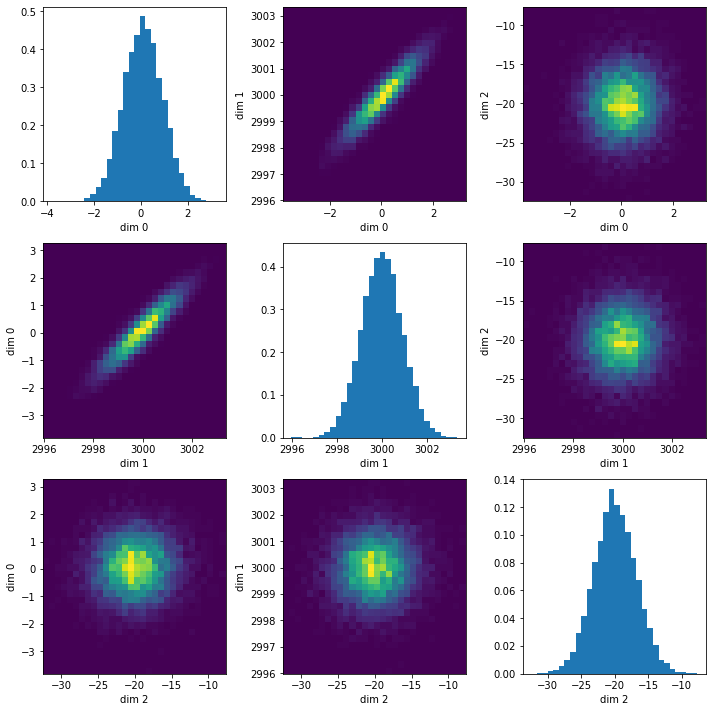

In [2]:
m = np.array([0.1,3000,-20])
S = np.array([[0.01,0.1,0.1],[1,1.1,1],[0,0,10]])

points = np.array([[-0.2,-0.7,1],[1,0,-1],[1.5,0.5,1]])


sample = np.random.multivariate_normal(m,S,size=10000)

fig, axs = plt.subplots(3,3, figsize=(10,10))
for i in range(3):
    for j in range(3):
        if i != j:
            h, xedges, yedges, *_ = axs[i,j].hist2d(sample[:,i],sample[:,j], bins=30, density=True)
            axs[i,j].set_xlabel("dim " + str(i))
            axs[i,j].set_ylabel("dim " + str(j))
            axs[i,j].set_xlim([xedges[0],xedges[-1]])
            axs[i,j].set_ylim([yedges[0],yedges[-1]])
            #axs[i,j].plot(points[:,i],points[:,j], c="red", marker="o")
        else:
            axs[i,j].hist(sample[:,i], bins=30, density=True)
            axs[i,j].set_xlabel("dim " + str(i))
plt.tight_layout()
plt.show()

In [3]:
def fit_line2dist(sample, num_points=100, xrange=[-100,100]):
    # Calculate the mean of the points, i.e. the 'center' of the cloud
    samplemean = sample.mean(axis=0)

    # Do an SVD on the mean-centered data.
    uu, dd, vv = np.linalg.svd(sample - samplemean)

    # Now vv[0] contains the first principal component, i.e. the direction
    # vector of the 'best fit' line in the least squares sense.
    linepts = vv[0] * np.linspace(xrange[0],xrange[1],num_points)[:, np.newaxis]

    # shift by the mean to get the line in the right place
    linepts += samplemean
    return linepts

def select_high_prob_linepoints(sample, line, dim0=0, dim1=1, d = 1, p0 = 0.01):
    hist_ij, i_edges, j_edges = np.histogram2d(sample[:,dim0], sample[:,dim1], bins=50, density=True)
    x, y = np.where(hist_ij > p0)
    x_data = i_edges[x]
    y_data = j_edges[y]
    xy = np.vstack([x_data, y_data]).T
    new_line = []
    for point in line:
        if (abs(point[dim0]-xy[:,0]) < d*np.std(xy[:,0])).any() and (abs(point[dim1]-xy[:,1])  < d*np.std(xy[:,1])).any():
            new_line.append(point)
    new_line = np.array(new_line)
    return new_line

In [4]:
n_dim=3

linepts = fit_line2dist(sample)

#newline = select_high_prob_linepoints(sample,linepts)
newline = select_high_prob_linepoints(sample, newline, dim0=0, dim1=2, d=0.5)

# Verify that everything looks right.
fig, ax = plt.subplots(1,n_dim, figsize=(12,4))
n = 0
for j in range(n_dim):
    for i in range(j):
        hist_ij, i_edges, j_edges = np.histogram2d(sample[:,i],sample[:,j], bins=50, density=True)
        ax[n].imshow(hist_ij.T, extent=(i_edges[0],i_edges[-1],j_edges[0],j_edges[-1]), origin="lower", aspect="auto")
        ax[n].plot(newline[:,i], newline[:,j], "r", marker="o")
        ax[n].set_xlabel("dim " + str(i))
        ax[n].set_ylabel("dim " + str(j))
        ax[n].set_xlim([i_edges[0],i_edges[-1]])
        ax[n].set_ylim([j_edges[0],j_edges[-1]])
        n += 1
plt.tight_layout()
plt.show()

NameError: name 'newline' is not defined